In [1]:
# importa, seta configuracao, le arquivo e tira colunas 'unnamed'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [2]:
df0 = pd.read_csv("aluno_quant_Materias_cotistas_0.csv", index_col=0)
df1 = pd.read_csv("aluno_quant_Materias_cotistas_1.csv", index_col=0)
df2 = pd.read_csv("aluno_quant_Materias_cotistas_2.csv", index_col=0)
df3 = pd.read_csv("aluno_quant_Materias_cotistas_3.csv", index_col=0)
df4 = pd.read_csv("aluno_quant_Materias_cotistas_4.csv", index_col=0)
df5 = pd.read_csv("aluno_quant_Materias_cotistas_5.csv", index_col=0)

In [3]:
#filtra materias
undropableCol = ["curso","saiu","Cotista","Raça","Sexo","Tipo de Escola"]
dropVal = 1
df0.drop([col for col, val in df0.sum().iteritems() if val < dropVal and col not in undropableCol], axis=1, inplace=True)
df1.drop([col for col, val in df1.sum().iteritems() if val < dropVal and col not in undropableCol], axis=1, inplace=True)
df2.drop([col for col, val in df2.sum().iteritems() if val < dropVal and col not in undropableCol], axis=1, inplace=True)
df3.drop([col for col, val in df3.sum().iteritems() if val < dropVal and col not in undropableCol], axis=1, inplace=True)
df4.drop([col for col, val in df4.sum().iteritems() if val < dropVal and col not in undropableCol], axis=1, inplace=True)
df5.drop([col for col, val in df5.sum().iteritems() if val < dropVal and col not in undropableCol], axis=1, inplace=True)


In [4]:
disciplinas = list(df0.columns[6:]) #- ["curso","saiu","Cotista","Raça","Sexo","Tipo de Escola"]
s = pd.Series(index = disciplinas, dtype=float)
# disciplinas

a = df0.sum()
for d in disciplinas:
#     print (type(d))
    b  = df0[df0[str(d)]>0].count()
    s[d] = a[str(d)]/b[0]

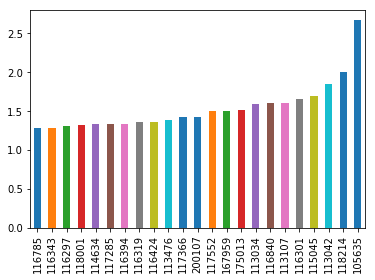

In [5]:
s[s>1.25].sort_values().plot.bar()

In [6]:
a = s[s>1.4].keys()

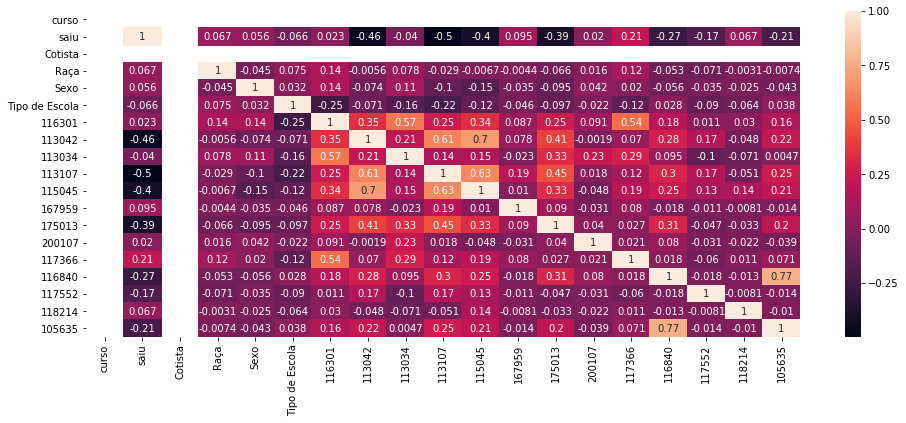

In [8]:
k = undropableCol + list(a)
f = df0[k]
plt.figure(figsize=(16, 6))
sns.heatmap(f.corr('spearman'), annot=True)

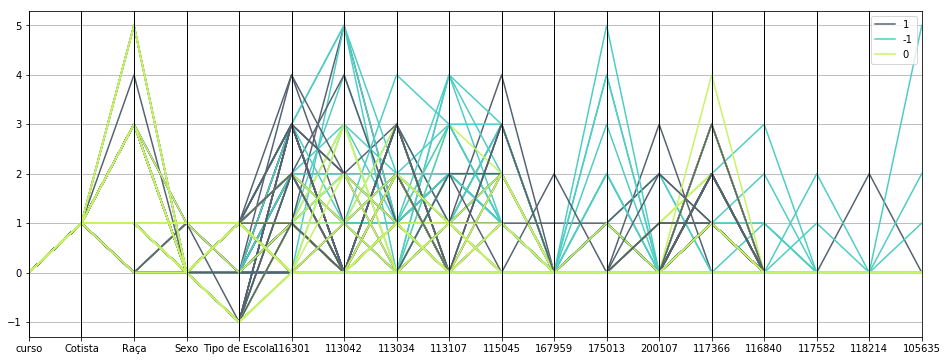

In [33]:
plt.figure(figsize=(16, 6))

pd.plotting.parallel_coordinates(
        f, 'saiu',
        color=('#556270', '#4ECDC4', '#C7F464'))
plt.show()